# **LGBM & XGBM**

## **Exploratory Data Analysis (EDA):**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df = pd.read_csv('/content/Titanic_test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train_df = pd.read_csv('/content/Titanic_train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


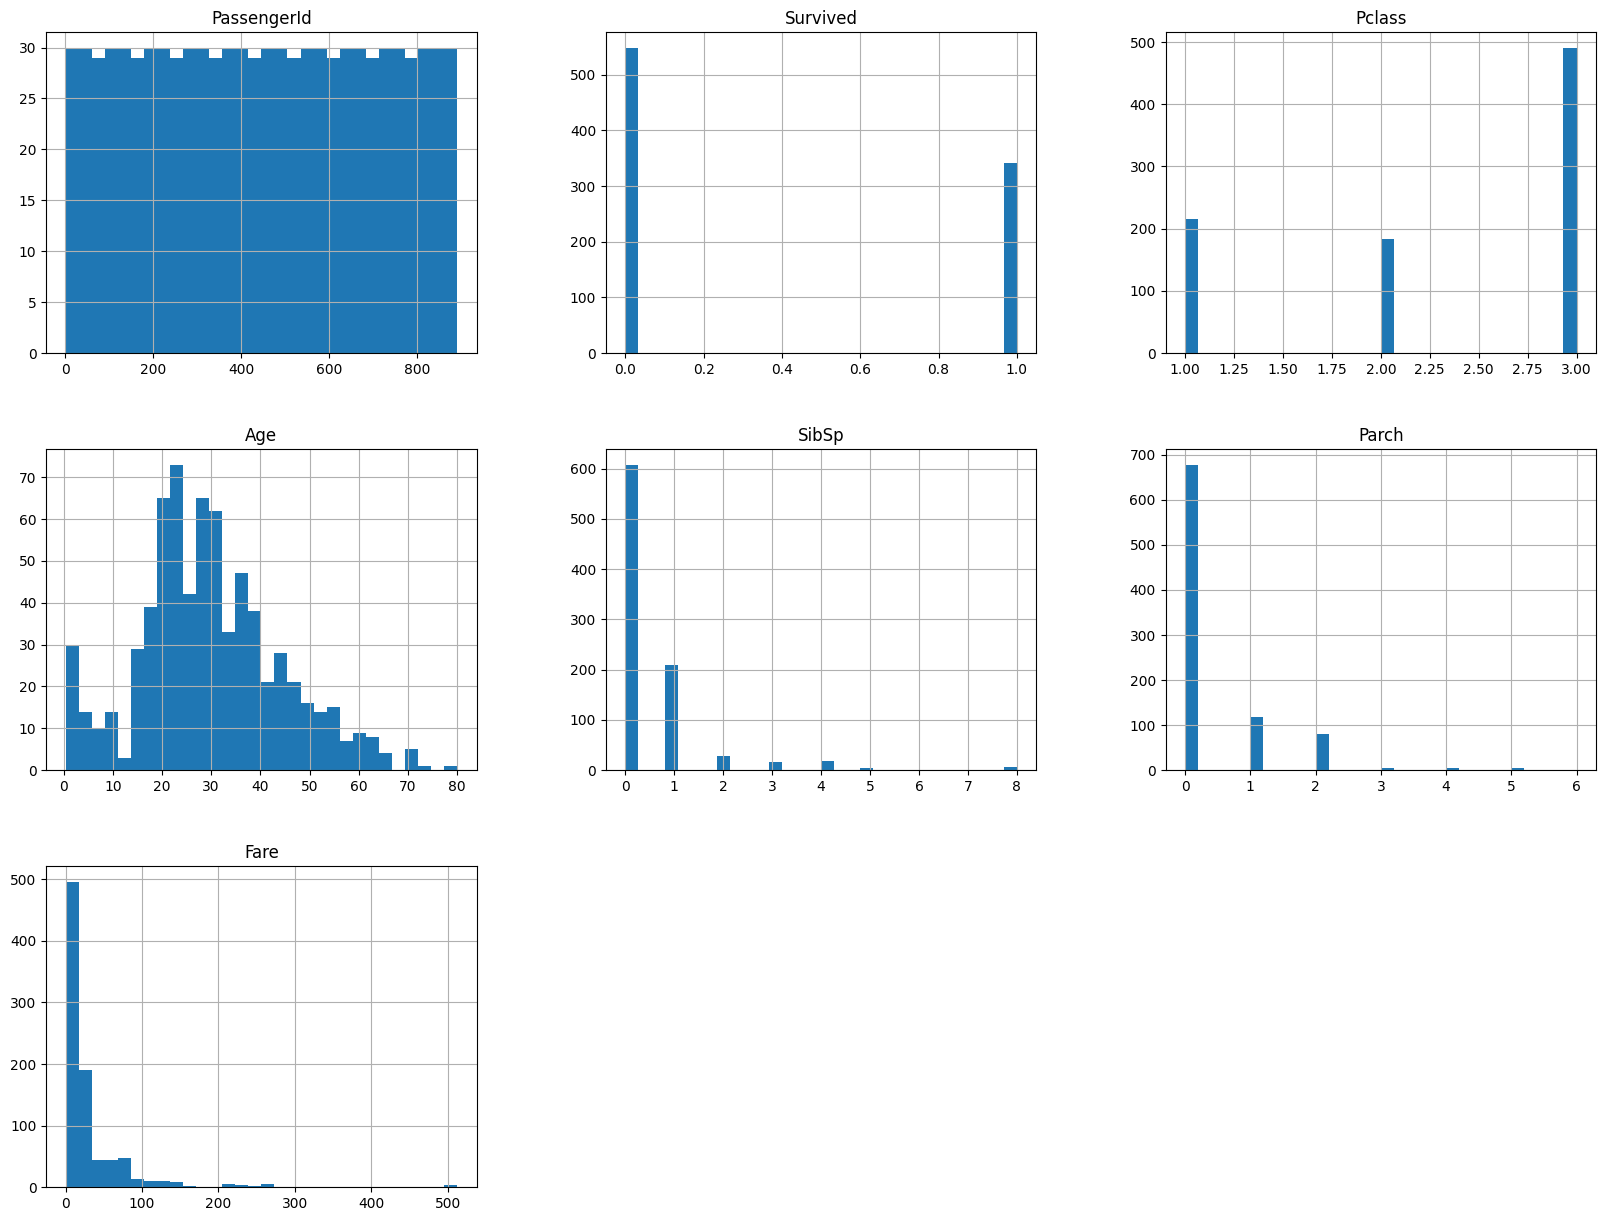

In [9]:
# Histograms
train_df.hist(bins=30, figsize=(20, 15))
plt.show()

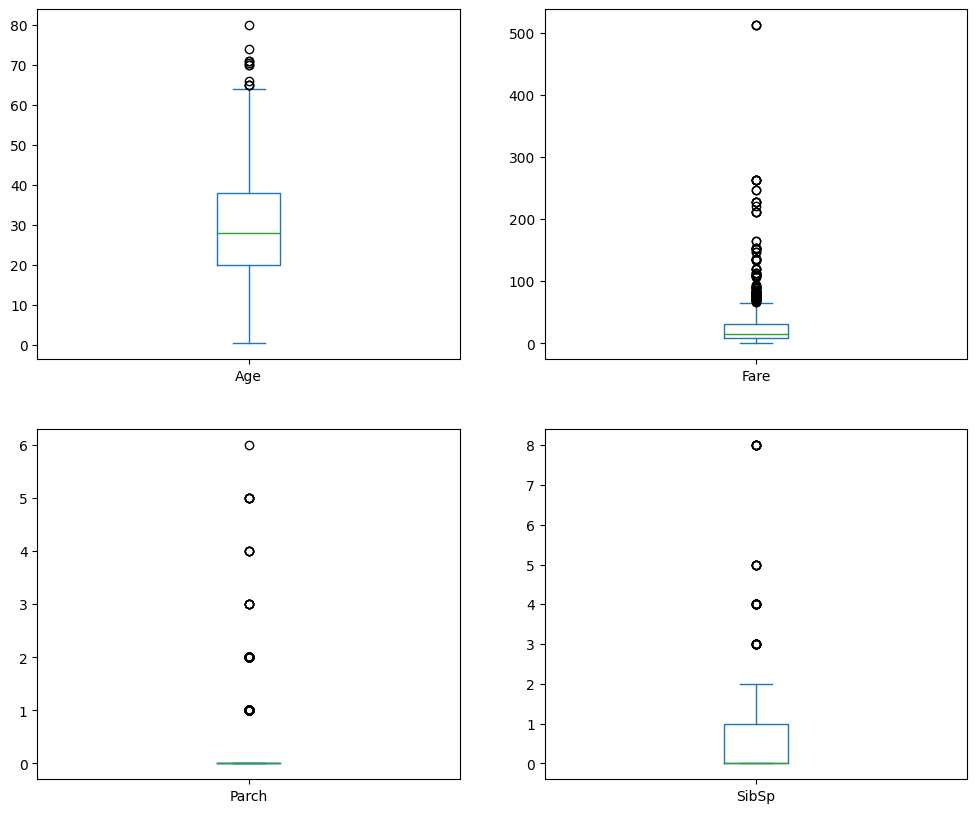

In [10]:
# Box plots for numerical features
numerical_features = ['Age', 'Fare', 'Parch', 'SibSp']
train_df[numerical_features].plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 10), sharex=False, sharey=False)
plt.show()

## **Data Preprocessing:**

In [17]:
# Define a function to detect outliers
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).any()

In [18]:
# For numerical columns
def impute_numerical(df, column):
    if has_outliers(df[column]):
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [19]:
# For categorical columns
def impute_categorical(df, column):
    df[column].fillna(df[column].mode()[0], inplace=True)

In [20]:
# Impute missing values in train_df
for column in train_df.columns:
    if train_df[column].dtype in ['int64', 'float64']:
        impute_numerical(train_df, column)
    elif train_df[column].dtype == 'object':
        impute_categorical(train_df, column)

In [22]:
# Impute missing values in test_df
for column in test_df.columns:
    if test_df[column].dtype in ['int64', 'float64']:
        impute_numerical(test_df, column)
    elif test_df[column].dtype == 'object':
        impute_categorical(test_df, column)

In [21]:
# Drop the 'Cabin' column from both datasets
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [23]:
# Check for remaining missing values to confirm imputation
print("Remaining missing values in training dataset:")
print(train_df.isnull().sum())

print("\nRemaining missing values in test dataset:")
print(test_df.isnull().sum())

Remaining missing values in training dataset:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Remaining missing values in test dataset:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [24]:
# One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

In [26]:
# Verify the structure of the datasets after encoding
print("\nTrain dataset structure:")
train_df.head()


Train dataset structure:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [27]:
print("\nTest dataset structure:")
test_df.head()


Test dataset structure:


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,True,False,False,False,True


## **Building Predictive Models:**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [32]:
# Define feature matrix X and target vector y
X = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train_df['Survived']

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [41]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.7765
Precision: 0.7179
Recall: 0.7568
F1-score: 0.7368
ROC-AUC: 0.7986


### **LightGBM Model**

In [48]:
# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)

LGBMClassifier(random_state=42, verbose=-1)

In [44]:
# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

In [45]:
# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

In [47]:
# Print evaluation metrics
print(f"LightGBM - Accuracy: {accuracy_lgb:.4f}")
print(f"LightGBM - Precision: {precision_lgb:.4f}")
print(f"LightGBM - Recall: {recall_lgb:.4f}")
print(f"LightGBM - F1-score: {f1_lgb:.4f}")
print(f"LightGBM - ROC-AUC: {roc_auc_lgb:.4f}")

LightGBM - Accuracy: 0.8212
LightGBM - Precision: 0.7838
LightGBM - Recall: 0.7838
LightGBM - F1-score: 0.7838
LightGBM - ROC-AUC: 0.8864


### **XGBoost Model**

In [49]:
import xgboost as xgb

In [50]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [51]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [52]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

In [53]:
# Print evaluation metrics
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - Precision: {precision_xgb:.4f}")
print(f"XGBoost - Recall: {recall_xgb:.4f}")
print(f"XGBoost - F1-score: {f1_xgb:.4f}")
print(f"XGBoost - ROC-AUC: {roc_auc_xgb:.4f}")

XGBoost - Accuracy: 0.7933
XGBoost - Precision: 0.7467
XGBoost - Recall: 0.7568
XGBoost - F1-score: 0.7517
XGBoost - ROC-AUC: 0.8669


### **LightGBM Model**
**Training and Evaluation**

In [54]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [56]:
# Cross-validation
cv_scores_lgb = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"LightGBM - Cross-validation Accuracy: {cv_scores_lgb.mean():.4f} (+/- {cv_scores_lgb.std():.4f})")

LightGBM - Cross-validation Accuracy: 0.8202 (+/- 0.0137)


In [57]:
# Train the model
lgb_model.fit(X_train, y_train)

LGBMClassifier(random_state=42, verbose=-1)

**Hyperparameter Tuning with GridSearchCV**

In [62]:
param_grid_lgb = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

In [63]:
grid_search_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42, verbose=-1), param_grid_lgb, cv=5, scoring='accuracy')
grid_search_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]},
             scoring='accuracy')

In [64]:
print(f"Best parameters for LightGBM: {grid_search_lgb.best_params_}")
best_lgb_model = grid_search_lgb.best_estimator_

Best parameters for LightGBM: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31}


In [65]:
# Evaluate the best model
y_pred_best_lgb = best_lgb_model.predict(X_test)
y_pred_proba_best_lgb = best_lgb_model.predict_proba(X_test)[:, 1]

In [66]:
accuracy_best_lgb = accuracy_score(y_test, y_pred_best_lgb)
precision_best_lgb = precision_score(y_test, y_pred_best_lgb)
recall_best_lgb = recall_score(y_test, y_pred_best_lgb)
f1_best_lgb = f1_score(y_test, y_pred_best_lgb)
roc_auc_best_lgb = roc_auc_score(y_test, y_pred_proba_best_lgb)

In [67]:
print(f"LightGBM (Tuned) - Accuracy: {accuracy_best_lgb:.4f}")
print(f"LightGBM (Tuned) - Precision: {precision_best_lgb:.4f}")
print(f"LightGBM (Tuned) - Recall: {recall_best_lgb:.4f}")
print(f"LightGBM (Tuned) - F1-score: {f1_best_lgb:.4f}")
print(f"LightGBM (Tuned) - ROC-AUC: {roc_auc_best_lgb:.4f}")

LightGBM (Tuned) - Accuracy: 0.8436
LightGBM (Tuned) - Precision: 0.8286
LightGBM (Tuned) - Recall: 0.7838
LightGBM (Tuned) - F1-score: 0.8056
LightGBM (Tuned) - ROC-AUC: 0.8932


### **XGBoost Model**
**Training and Evaluation**

In [68]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [69]:
# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"XGBoost - Cross-validation Accuracy: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std():.4f})")

XGBoost - Cross-validation Accuracy: 0.7936 (+/- 0.0141)


In [70]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Hyperparameter Tuning with GridSearchCV**

In [71]:
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

In [72]:
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42, verbosity=0), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [73]:
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
best_xgb_model = grid_search_xgb.best_estimator_

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [74]:
# Evaluate the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_pred_proba_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

In [75]:
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, y_pred_proba_best_xgb)

In [76]:
print(f"XGBoost (Tuned) - Accuracy: {accuracy_best_xgb:.4f}")
print(f"XGBoost (Tuned) - Precision: {precision_best_xgb:.4f}")
print(f"XGBoost (Tuned) - Recall: {recall_best_xgb:.4f}")
print(f"XGBoost (Tuned) - F1-score: {f1_best_xgb:.4f}")
print(f"XGBoost (Tuned) - ROC-AUC: {roc_auc_best_xgb:.4f}")

XGBoost (Tuned) - Accuracy: 0.8212
XGBoost (Tuned) - Precision: 0.8281
XGBoost (Tuned) - Recall: 0.7162
XGBoost (Tuned) - F1-score: 0.7681
XGBoost (Tuned) - ROC-AUC: 0.8826


## **Comparative Analysis:**

In [77]:
import pandas as pd

# Create a DataFrame to compare the performance metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'LightGBM': [accuracy_lgb, precision_lgb, recall_lgb, f1_lgb, roc_auc_lgb],
    'LightGBM (Tuned)': [accuracy_best_lgb, precision_best_lgb, recall_best_lgb, f1_best_lgb, roc_auc_best_lgb],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb],
    'XGBoost (Tuned)': [accuracy_best_xgb, precision_best_xgb, recall_best_xgb, f1_best_xgb, roc_auc_best_xgb]
})

print("Performance Metrics Comparison:")
print(metrics)


Performance Metrics Comparison:
      Metric  LightGBM  LightGBM (Tuned)   XGBoost  XGBoost (Tuned)
0   Accuracy  0.821229          0.843575  0.793296         0.821229
1  Precision  0.783784          0.828571  0.746667         0.828125
2     Recall  0.783784          0.783784  0.756757         0.716216
3   F1-score  0.783784          0.805556  0.751678         0.768116
4    ROC-AUC  0.886358          0.893179  0.866924         0.882625


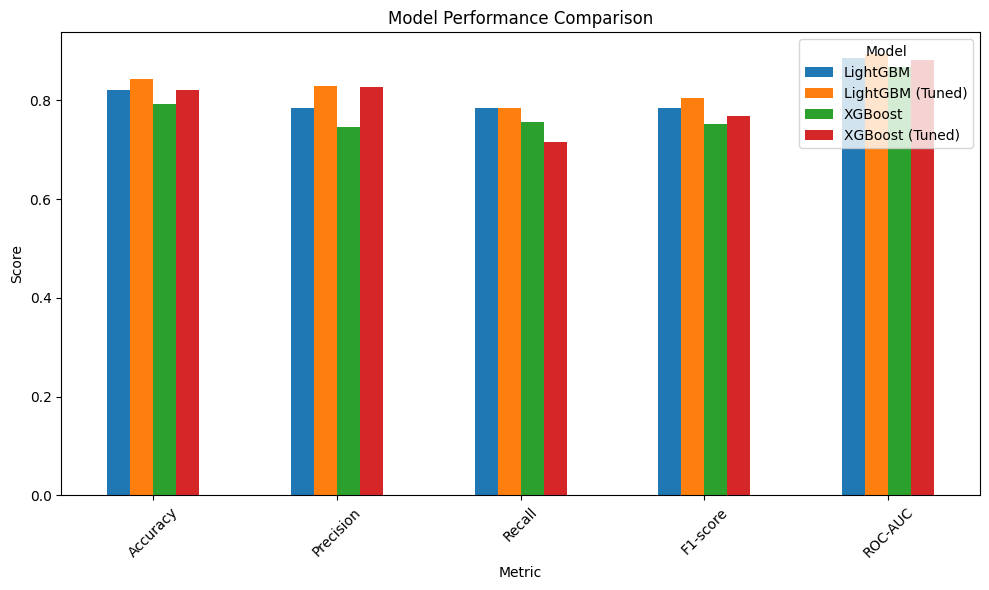

In [78]:
import matplotlib.pyplot as plt

# Set up the bar plot for comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the performance metrics
metrics.set_index('Metric').plot(kind='bar', ax=ax)
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()

# Show the plot
plt.show()